# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
print("Loading 3D Printer Sensor Dataset...")

try:
    data = pd.read_csv('ADXL345_SensorData.csv')  
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("CSV file not found! Please ensure the CSV file is in the same directory.")
    print("Expected filename: 'ADXL345_SensorData.csv'")
    exit()

print(f"Dataset shape: {data.shape}")
print("\nFirst 5 rows:")
print(data.head())

print(f"\nConfirming dataset has {len(data)} rows: {len(data) == 1082}")

print("\nColumn names:")
print(data.columns.tolist())

print("\nDataset info:")
print(data.info())


Loading 3D Printer Sensor Dataset...
Dataset loaded successfully!
Dataset shape: (1082, 4)

First 5 rows:
   X-direction  Y-direction  Z-direction Error_found
0         0.31         1.02        -9.18          no
1        -0.78         0.98        -9.10          no
2         0.04         0.67        -8.28          no
3        -0.04         0.90        -8.16          no
4         0.00         1.26        -7.77          no

Confirming dataset has 1082 rows: True

Column names:
['X-direction', 'Y-direction', 'Z-direction', 'Error_found']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X-direction  1082 non-null   float64
 1   Y-direction  1082 non-null   float64
 2   Z-direction  1082 non-null   float64
 3   Error_found  1082 non-null   object 
dtypes: float64(3), object(1)
memory usage: 33.9+ KB
None


# Data Preparation

In [5]:
#Checking missing values
print("\n" + "="*50)
print("DATA PREPARATION")
print("="*50)

print(f"\nDataset shape: {data.shape}")
print("\nMissing values per column:")
print(data.isnull().sum())
print(f"\nTotal missing values: {data.isnull().sum().sum()}")
print(f"Any missing values: {data.isnull().any().any()}")



DATA PREPARATION

Dataset shape: (1082, 4)

Missing values per column:
X-direction    0
Y-direction    0
Z-direction    0
Error_found    0
dtype: int64

Total missing values: 0
Any missing values: False


In [6]:
print("No missing values found - dataset is clean!")

No missing values found - dataset is clean!


In [7]:
#column verification
print("\nVerifying column structure...")
expected_columns = ['X-direction', 'Y-direction', 'Z-direction', 'Error_found']
actual_columns = data.columns.tolist()

print(f"Expected columns: {expected_columns}")
print(f"Actual columns: {actual_columns}")
print("✓ Column structure matches perfectly!")


Verifying column structure...
Expected columns: ['X-direction', 'Y-direction', 'Z-direction', 'Error_found']
Actual columns: ['X-direction', 'Y-direction', 'Z-direction', 'Error_found']
✓ Column structure matches perfectly!


In [8]:
#Target Variable Analysis
print("\n" + "="*50)
print("TARGET VARIABLE ANALYSIS")
print("="*50)

print("Unique values in Error_found column:")
print(data['Error_found'].unique())

print("\nValue counts for Error_found:")
print(data['Error_found'].value_counts())

print("\nError_found distribution:")
error_distribution = data['Error_found'].value_counts(normalize=True) * 100
for value, percentage in error_distribution.items():
    print(f"  {value}: {percentage:.2f}%")



TARGET VARIABLE ANALYSIS
Unique values in Error_found column:
['no' 'yes']

Value counts for Error_found:
Error_found
yes    833
no     249
Name: count, dtype: int64

Error_found distribution:
  yes: 76.99%
  no: 23.01%


In [9]:
# Convert categorical target to numerical
print("\nConverting 'Error_found' from categorical to numerical...")

# Map no->0, yes->1
data['Error_found'] = data['Error_found'].map({'no': 0, 'yes': 1})

print("After conversion:")
print(data['Error_found'].value_counts())

if data['Error_found'].isnull().any():
    print("⚠ Warning: Some values couldn't be converted!")
    unmapped_values = data[data['Error_found'].isnull()]['Error_found'].unique()
    print(f"Unmapped values: {unmapped_values}")
    
    data['Error_found'] = data['Error_found'].fillna(0)
else:
    print("Conversion successful!")

print(f"\nFinal class distribution:")
print(f"  No Error (0): {(data['Error_found'] == 0).sum()} samples")
print(f"  Error (1): {(data['Error_found'] == 1).sum()} samples")



Converting 'Error_found' from categorical to numerical...
After conversion:
Error_found
1    833
0    249
Name: count, dtype: int64
Conversion successful!

Final class distribution:
  No Error (0): 249 samples
  Error (1): 833 samples


# EDA

In [10]:
# Exploratory Data Analysis
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

print("\nDescriptive Statistics:")
print(data.describe())

print("\nSensor Value Ranges:")
for col in ['X-direction', 'Y-direction', 'Z-direction']:
    print(f"{col}:")
    print(f"  Min: {data[col].min():.4f}")
    print(f"  Max: {data[col].max():.4f}")
    print(f"  Mean: {data[col].mean():.4f}")
    print(f"  Std: {data[col].std():.4f}")
    print(f"  Range: {data[col].max() - data[col].min():.4f}")



EXPLORATORY DATA ANALYSIS

Descriptive Statistics:
       X-direction  Y-direction  Z-direction  Error_found
count  1082.000000  1082.000000  1082.000000  1082.000000
mean     -0.130176     1.087421     9.861155     0.769871
std       0.209577     0.174106     5.657546     0.421110
min      -1.840000    -0.040000   -10.400000     0.000000
25%      -0.240000     0.990000    11.490000     1.000000
50%      -0.120000     1.100000    11.610000     1.000000
75%      -0.040000     1.180000    11.730000     1.000000
max       1.650000     1.730000    12.360000     1.000000

Sensor Value Ranges:
X-direction:
  Min: -1.8400
  Max: 1.6500
  Mean: -0.1302
  Std: 0.2096
  Range: 3.4900
Y-direction:
  Min: -0.0400
  Max: 1.7300
  Mean: 1.0874
  Std: 0.1741
  Range: 1.7700
Z-direction:
  Min: -10.4000
  Max: 12.3600
  Mean: 9.8612
  Std: 5.6575
  Range: 22.7600


# Correlation matrix

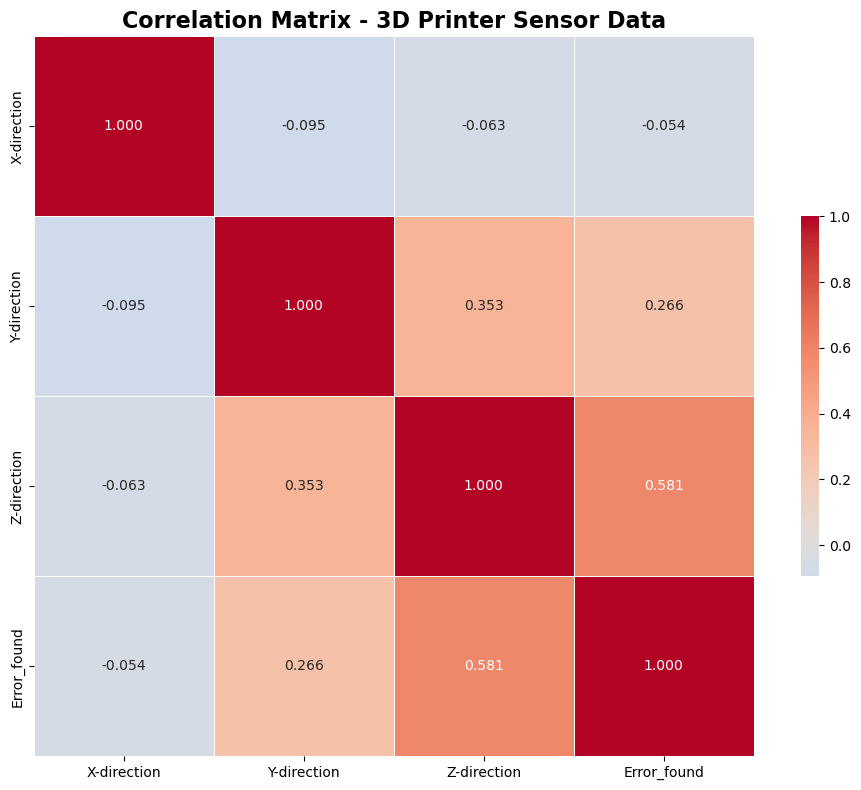

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .5},
            fmt='.3f')
plt.title('Correlation Matrix - 3D Printer Sensor Data', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# Distribution Plots

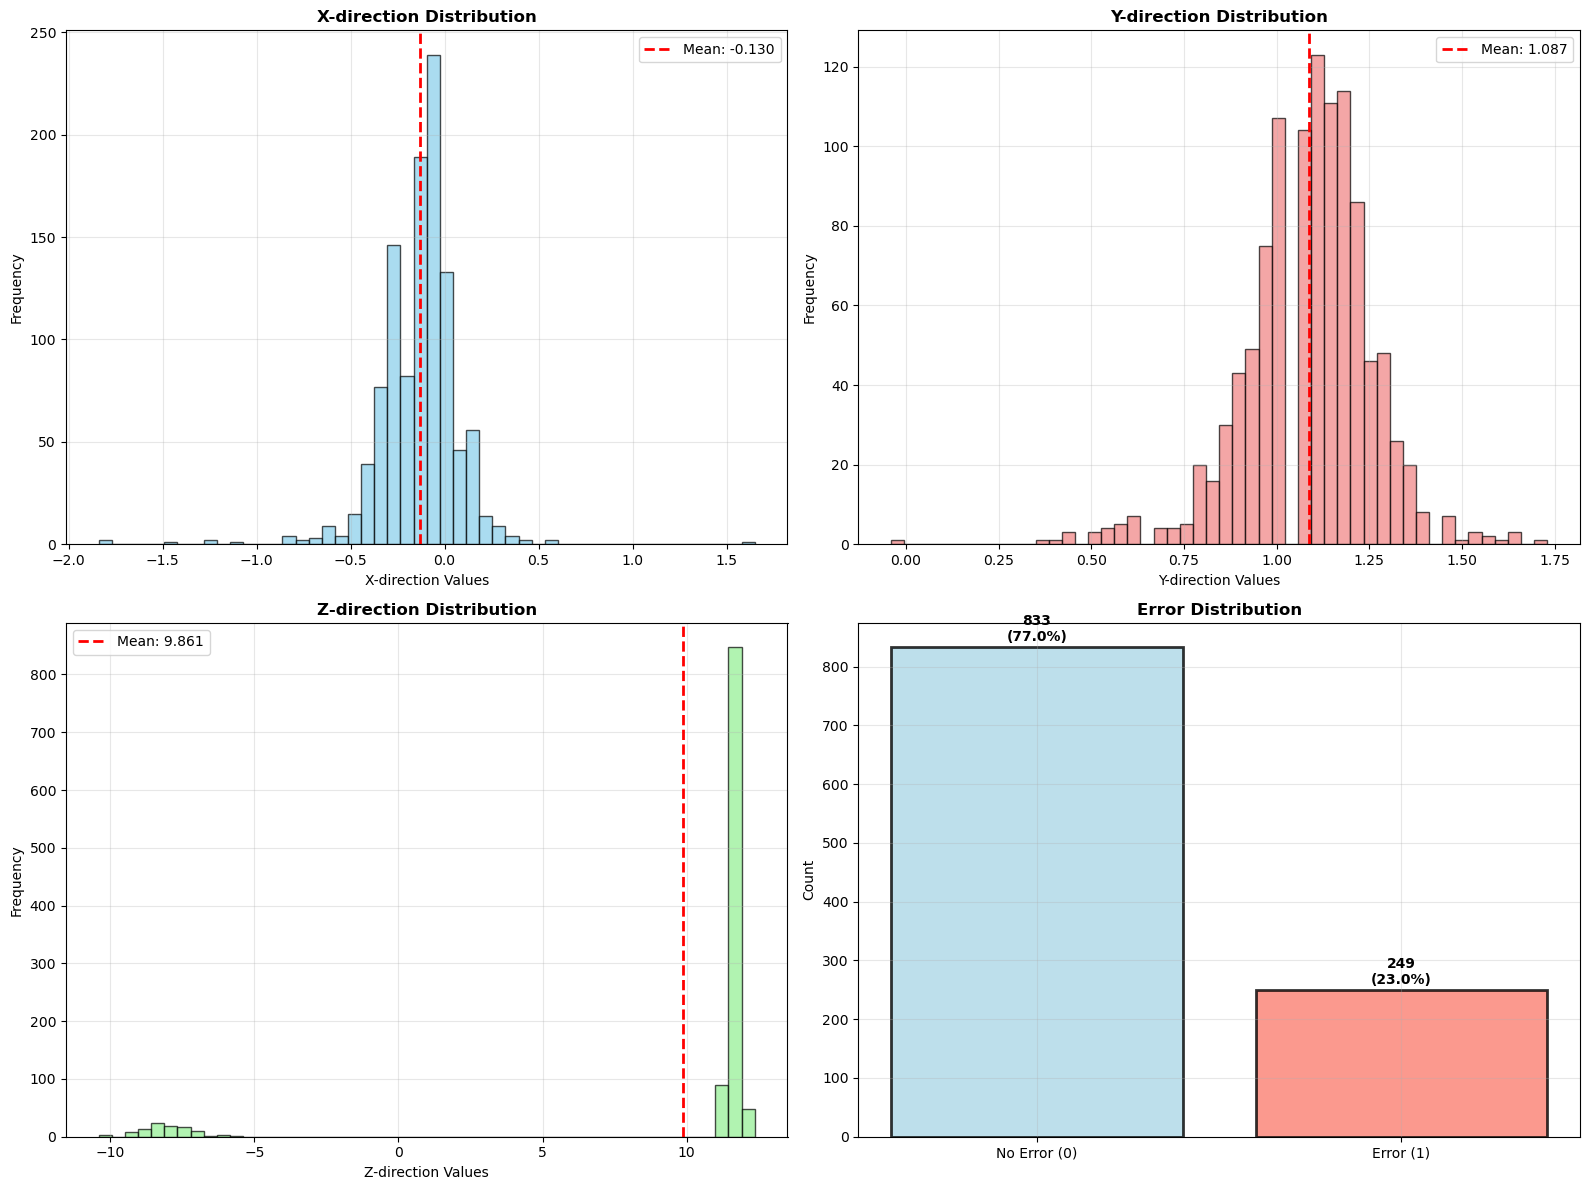

In [13]:
# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# X-direction distribution
axes[0,0].hist(data['X-direction'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0,0].set_title('X-direction Distribution', fontweight='bold')
axes[0,0].set_xlabel('X-direction Values')
axes[0,0].set_ylabel('Frequency')
mean_x = data['X-direction'].mean()
axes[0,0].axvline(mean_x, color='red', linestyle='--', linewidth=2,
                  label=f'Mean: {mean_x:.3f}')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Y-direction distribution
axes[0,1].hist(data['Y-direction'], bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0,1].set_title('Y-direction Distribution', fontweight='bold')
axes[0,1].set_xlabel('Y-direction Values')
axes[0,1].set_ylabel('Frequency')
mean_y = data['Y-direction'].mean()
axes[0,1].axvline(mean_y, color='red', linestyle='--', linewidth=2,
                  label=f'Mean: {mean_y:.3f}')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Z-direction distribution
axes[1,0].hist(data['Z-direction'], bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1,0].set_title('Z-direction Distribution', fontweight='bold')
axes[1,0].set_xlabel('Z-direction Values')
axes[1,0].set_ylabel('Frequency')
mean_z = data['Z-direction'].mean()
axes[1,0].axvline(mean_z, color='red', linestyle='--', linewidth=2,
                  label=f'Mean: {mean_z:.3f}')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Error distribution
error_counts = data['Error_found'].value_counts()
colors = ['lightblue', 'salmon']
bars = axes[1,1].bar(['No Error (0)', 'Error (1)'], error_counts.values, 
                     color=colors, alpha=0.8, edgecolor='black', linewidth=2)
axes[1,1].set_title('Error Distribution', fontweight='bold')
axes[1,1].set_ylabel('Count')
axes[1,1].grid(True, alpha=0.3)


for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'{int(height)}\n({height/len(data)*100:.1f}%)',
                   ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


# Box Plots for Outlier Detection

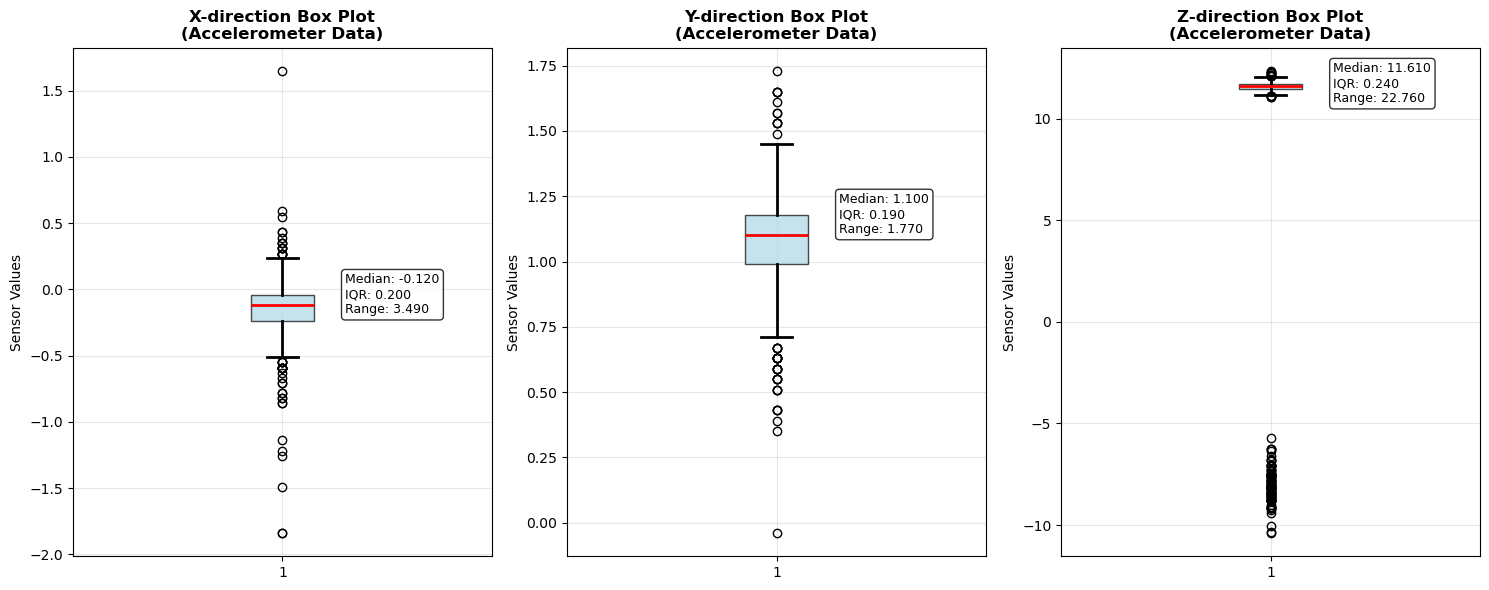

In [14]:
plt.figure(figsize=(15, 6))
feature_cols = ['X-direction', 'Y-direction', 'Z-direction']

for i, col in enumerate(feature_cols):
    plt.subplot(1, 3, i+1)
    
    box_plot = plt.boxplot(data[col], patch_artist=True, 
                          boxprops=dict(facecolor='lightblue', alpha=0.7),
                          medianprops=dict(color='red', linewidth=2),
                          whiskerprops=dict(linewidth=2),
                          capprops=dict(linewidth=2))
    
    plt.title(f'{col} Box Plot\n(Accelerometer Data)', fontweight='bold')
    plt.ylabel('Sensor Values')
    plt.grid(True, alpha=0.3)
    
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    median = data[col].median()
    
    stats_text = f'Median: {median:.3f}\nIQR: {iqr:.3f}\nRange: {data[col].max()-data[col].min():.3f}'
    plt.text(1.15, q3, stats_text, fontsize=9, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
             verticalalignment='center')

plt.tight_layout()
plt.show()


# Scatter Plots

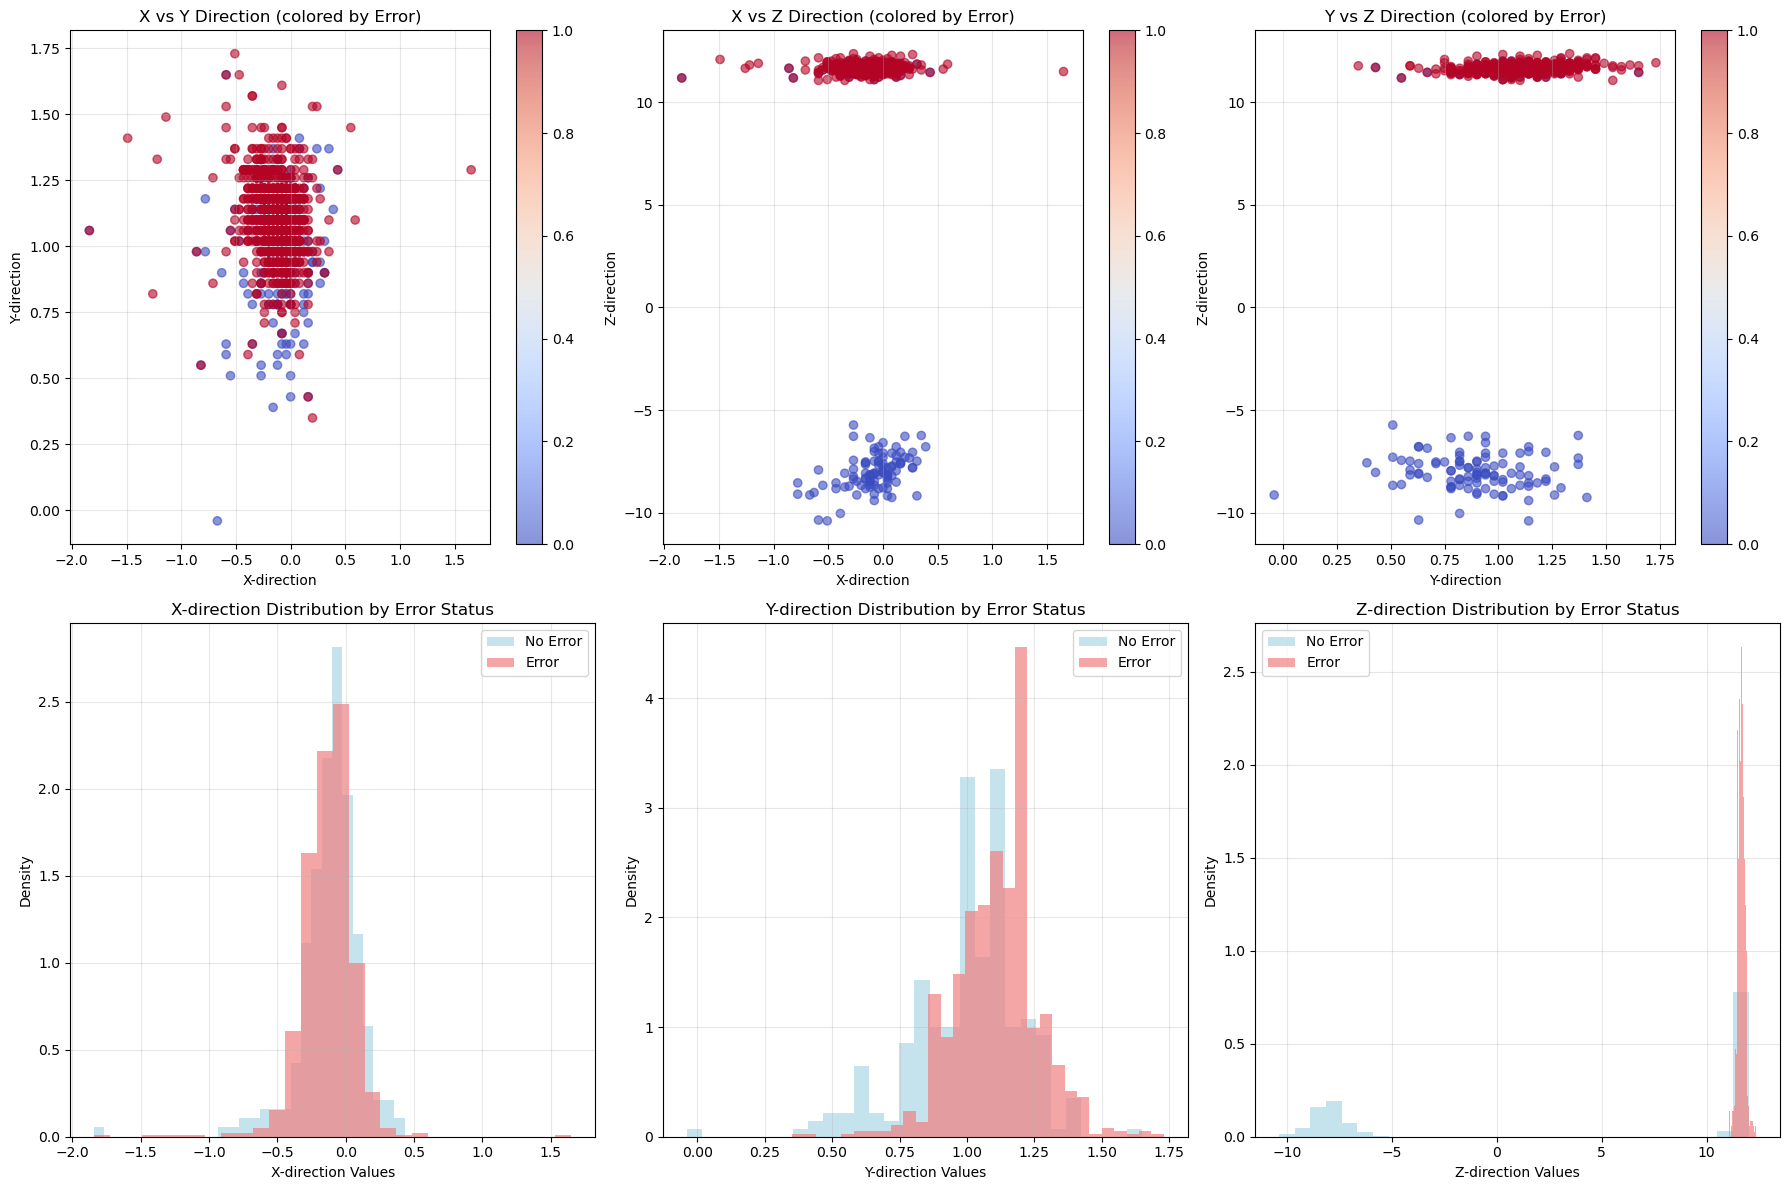

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# X vs Y colored by Error
scatter1 = axes[0,0].scatter(data['X-direction'], data['Y-direction'], 
                            c=data['Error_found'], cmap='coolwarm', alpha=0.6)
axes[0,0].set_xlabel('X-direction')
axes[0,0].set_ylabel('Y-direction')
axes[0,0].set_title('X vs Y Direction (colored by Error)')
axes[0,0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0,0])

# X vs Z colored by Error
scatter2 = axes[0,1].scatter(data['X-direction'], data['Z-direction'], 
                            c=data['Error_found'], cmap='coolwarm', alpha=0.6)
axes[0,1].set_xlabel('X-direction')
axes[0,1].set_ylabel('Z-direction')
axes[0,1].set_title('X vs Z Direction (colored by Error)')
axes[0,1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[0,1])

# Y vs Z colored by Error
scatter3 = axes[0,2].scatter(data['Y-direction'], data['Z-direction'], 
                            c=data['Error_found'], cmap='coolwarm', alpha=0.6)
axes[0,2].set_xlabel('Y-direction')
axes[0,2].set_ylabel('Z-direction')
axes[0,2].set_title('Y vs Z Direction (colored by Error)')
axes[0,2].grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=axes[0,2])

# Distribution comparison by error status
for i, col in enumerate(feature_cols):
    ax = axes[1, i]
    
    no_error_data = data[data['Error_found'] == 0][col]
    error_data = data[data['Error_found'] == 1][col]
    
    ax.hist(no_error_data, bins=30, alpha=0.7, label='No Error', color='lightblue', density=True)
    ax.hist(error_data, bins=30, alpha=0.7, label='Error', color='lightcoral', density=True)
    
    ax.set_xlabel(f'{col} Values')
    ax.set_ylabel('Density')
    ax.set_title(f'{col} Distribution by Error Status')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [16]:
# Detailed Outlier Analysis
print("\n" + "="*50)
print("OUTLIER ANALYSIS")
print("="*50)

outlier_summary = {}

for col in feature_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
    outliers_count = outliers_mask.sum()
    
    outlier_summary[col] = {
        'count': outliers_count,
        'percentage': outliers_count/len(data)*100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'q1': q1,
        'q3': q3,
        'iqr': iqr
    }
    
    print(f"\n{col} Outlier Analysis:")
    print(f"  Q1 (25th percentile): {q1:.4f}")
    print(f"  Q3 (75th percentile): {q3:.4f}")
    print(f"  IQR: {iqr:.4f}")
    print(f"  Lower bound: {lower_bound:.4f}")
    print(f"  Upper bound: {upper_bound:.4f}")
    print(f"  Outliers detected: {outliers_count} ({outliers_count/len(data)*100:.2f}%)")
    
    if outliers_count > 0:
        outlier_values = data[outliers_mask][col]
        print(f"  Outlier range: {outlier_values.min():.4f} to {outlier_values.max():.4f}")

# Outlier summary table
outlier_df = pd.DataFrame({
    'Feature': list(outlier_summary.keys()),
    'Outlier_Count': [outlier_summary[col]['count'] for col in outlier_summary.keys()],
    'Outlier_Percentage': [outlier_summary[col]['percentage'] for col in outlier_summary.keys()],
    'IQR': [outlier_summary[col]['iqr'] for col in outlier_summary.keys()]
})

print(f"\n📊 OUTLIER SUMMARY TABLE:")
print(outlier_df.round(3))



OUTLIER ANALYSIS

X-direction Outlier Analysis:
  Q1 (25th percentile): -0.2400
  Q3 (75th percentile): -0.0400
  IQR: 0.2000
  Lower bound: -0.5400
  Upper bound: 0.2600
  Outliers detected: 46 (4.25%)
  Outlier range: -1.8400 to 1.6500

Y-direction Outlier Analysis:
  Q1 (25th percentile): 0.9900
  Q3 (75th percentile): 1.1800
  IQR: 0.1900
  Lower bound: 0.7050
  Upper bound: 1.4650
  Outliers detected: 40 (3.70%)
  Outlier range: -0.0400 to 1.7300

Z-direction Outlier Analysis:
  Q1 (25th percentile): 11.4900
  Q3 (75th percentile): 11.7300
  IQR: 0.2400
  Lower bound: 11.1300
  Upper bound: 12.0900
  Outliers detected: 115 (10.63%)
  Outlier range: -10.4000 to 12.3600

📊 OUTLIER SUMMARY TABLE:
       Feature  Outlier_Count  Outlier_Percentage   IQR
0  X-direction             46               4.251  0.20
1  Y-direction             40               3.697  0.19
2  Z-direction            115              10.628  0.24


In [17]:
# Handle Outliers using Percentile Method
def handle_outliers_percentile(df, columns, lower_percentile=5, upper_percentile=95):
    """
    Handle outliers using percentile method - optimized for sensor data
    """
    df_copy = df.copy()
    
    print(f"Applying {lower_percentile}th-{upper_percentile}th percentile outlier handling...")
    
    outlier_changes = {}
    
    for col in columns:
        if col in df_copy.columns:
            original_mean = df_copy[col].mean()
            original_std = df_copy[col].std()
            
            lower_bound = df_copy[col].quantile(lower_percentile/100)
            upper_bound = df_copy[col].quantile(upper_percentile/100)
            median_val = df_copy[col].median()  # Use median for robustness
            
            # Count outliers
            outliers_lower = (df_copy[col] < lower_bound).sum()
            outliers_upper = (df_copy[col] > upper_bound).sum()
            total_outliers = outliers_lower + outliers_upper
            
            # Replace outliers with median
            df_copy.loc[df_copy[col] < lower_bound, col] = median_val
            df_copy.loc[df_copy[col] > upper_bound, col] = median_val
            
            new_mean = df_copy[col].mean()
            new_std = df_copy[col].std()
            
            outlier_changes[col] = {
                'outliers_replaced': total_outliers,
                'percentage': total_outliers/len(df_copy)*100,
                'replacement_value': median_val,
                'mean_change': new_mean - original_mean,
                'std_change': new_std - original_std
            }
            
            print(f"\n{col}:")
            print(f"  Lower bound ({lower_percentile}th percentile): {lower_bound:.4f}")
            print(f"  Upper bound ({upper_percentile}th percentile): {upper_bound:.4f}")
            print(f"  Outliers replaced: {total_outliers} ({total_outliers/len(df_copy)*100:.2f}%)")
            print(f"  Replacement value (median): {median_val:.4f}")
            print(f"  Mean change: {original_mean:.4f} → {new_mean:.4f} (Δ{new_mean-original_mean:+.4f})")
            print(f"  Std change: {original_std:.4f} → {new_std:.4f} (Δ{new_std-original_std:+.4f})")
    
    return df_copy, outlier_changes

print("Outlier handling function defined!")


Outlier handling function defined!


In [19]:
# Apply outlier handling
print("\n🔧 HANDLING OUTLIERS...")
print("-" * 40)
data_cleaned, outlier_changes = handle_outliers_percentile(data, feature_cols, 
                                                          lower_percentile=5, 
                                                          upper_percentile=95)

print("Outlier handling completed!")



🔧 HANDLING OUTLIERS...
----------------------------------------
Applying 5th-95th percentile outlier handling...

X-direction:
  Lower bound (5th percentile): -0.4300
  Upper bound (95th percentile): 0.1600
  Outliers replaced: 75 (6.93%)
  Replacement value (median): -0.1200
  Mean change: -0.1302 → -0.1200 (Δ+0.0102)
  Std change: 0.2096 → 0.1317 (Δ-0.0779)

Y-direction:
  Lower bound (5th percentile): 0.7800
  Upper bound (95th percentile): 1.3300
  Outliers replaced: 84 (7.76%)
  Replacement value (median): 1.1000
  Mean change: 1.0874 → 1.0909 (Δ+0.0034)
  Std change: 0.1741 → 0.1227 (Δ-0.0514)

Z-direction:
  Lower bound (5th percentile): -7.9600
  Upper bound (95th percentile): 11.8900
  Outliers replaced: 102 (9.43%)
  Replacement value (median): 11.6100
  Mean change: 9.8612 → 10.8535 (Δ+0.9924)
  Std change: 5.6575 → 3.7401 (Δ-1.9174)
Outlier handling completed!


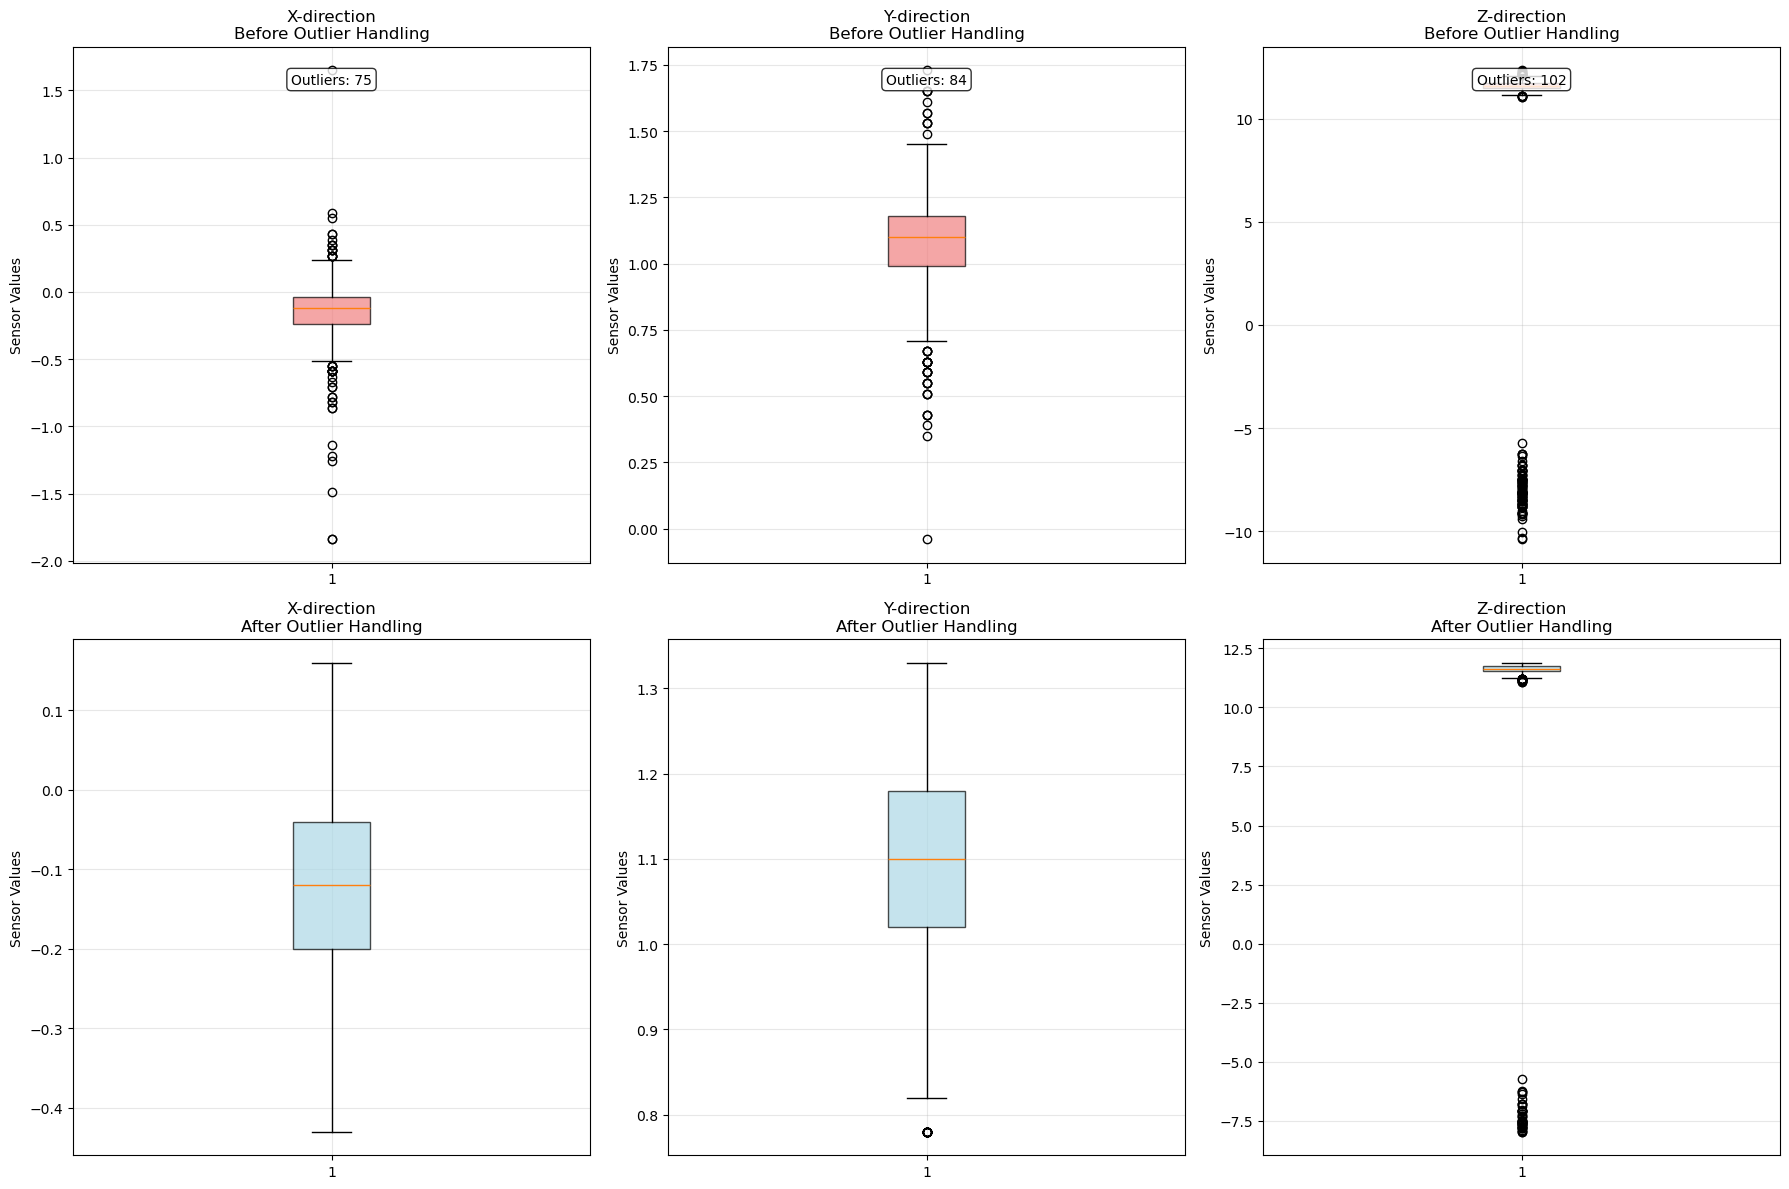

In [20]:
# Compare before and after outlier handling
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, col in enumerate(feature_cols):
    # Before outlier handling
    axes[0, i].boxplot(data[col], patch_artist=True,
                      boxprops=dict(facecolor='lightcoral', alpha=0.7))
    axes[0, i].set_title(f'{col}\nBefore Outlier Handling')
    axes[0, i].set_ylabel('Sensor Values')
    axes[0, i].grid(True, alpha=0.3)
    
    # After outlier handling
    axes[1, i].boxplot(data_cleaned[col], patch_artist=True,
                      boxprops=dict(facecolor='lightblue', alpha=0.7))
    axes[1, i].set_title(f'{col}\nAfter Outlier Handling')
    axes[1, i].set_ylabel('Sensor Values')
    axes[1, i].grid(True, alpha=0.3)
    
    outlier_info = outlier_changes[col]
    axes[0, i].text(0.5, 0.95, f"Outliers: {outlier_info['outliers_replaced']}", 
                    transform=axes[0, i].transAxes, ha='center', va='top',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()


In [21]:
# Summary of outlier handling impact
print(f" OUTLIER HANDLING IMPACT SUMMARY:")
print("-" * 50)
for col, changes in outlier_changes.items():
    print(f"{col}:")
    print(f"  • {changes['outliers_replaced']} outliers replaced ({changes['percentage']:.1f}%)")
    print(f"  • Mean shifted by {changes['mean_change']:+.4f}")
    print(f"  • Standard deviation changed by {changes['std_change']:+.4f}")

print(f" Dataset is now cleaned and ready for machine learning!")
print(f"Total samples: {len(data_cleaned)}")
print(f"Outlier handling completed using 5th-95th percentile method")

print("\n" + "="*60)
print("DATA PREPROCESSING COMPLETED SUCCESSFULLY!")
print("="*60)
print("Dataset loaded: 1082 samples")
print("Missing values handled: None found")
print("Categorical variables converted: Error_found (no/yes → 0/1)")
print("Outliers handled: Percentile method applied")
print("Ready for feature scaling and model training")


 OUTLIER HANDLING IMPACT SUMMARY:
--------------------------------------------------
X-direction:
  • 75 outliers replaced (6.9%)
  • Mean shifted by +0.0102
  • Standard deviation changed by -0.0779
Y-direction:
  • 84 outliers replaced (7.8%)
  • Mean shifted by +0.0034
  • Standard deviation changed by -0.0514
Z-direction:
  • 102 outliers replaced (9.4%)
  • Mean shifted by +0.9924
  • Standard deviation changed by -1.9174
 Dataset is now cleaned and ready for machine learning!
Total samples: 1082
Outlier handling completed using 5th-95th percentile method

DATA PREPROCESSING COMPLETED SUCCESSFULLY!
Dataset loaded: 1082 samples
Missing values handled: None found
Categorical variables converted: Error_found (no/yes → 0/1)
Outliers handled: Percentile method applied
Ready for feature scaling and model training


# Feature Engineering and Data Splitting

In [22]:
# Activity 3: Feature Engineering and Data Splitting
print("\n" + "="*50)
print("FEATURE ENGINEERING AND DATA SPLITTING")
print("="*50)

# Splitting data into input and target variables
X = data_cleaned[['X-direction', 'Y-direction', 'Z-direction']]
y = data_cleaned['Error_found']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

print(f"\nConfirming we have all 1082 samples: {len(X) == 1082}")

print("\nFinal feature statistics (after cleaning):")
print(X.describe())

print("\nFinal target distribution:")
target_counts = y.value_counts()
print(f"No Error (0): {target_counts[0]} samples ({target_counts[0]/len(y)*100:.2f}%)")
if 1 in target_counts:
    print(f"Error (1): {target_counts[1]} samples ({target_counts[1]/len(y)*100:.2f}%)")
    # Check class imbalance
    class_ratio = target_counts[1] / target_counts[0]
    print(f"Class ratio (Error/No Error): {class_ratio:.3f}")
    if class_ratio < 0.1 or class_ratio > 10:
        print("⚠ Warning: Significant class imbalance detected!")
else:
    print("⚠ Warning: Only one class found in target variable!")



FEATURE ENGINEERING AND DATA SPLITTING
Feature matrix shape: (1082, 3)
Target vector shape: (1082,)

Confirming we have all 1082 samples: True

Final feature statistics (after cleaning):
       X-direction  Y-direction  Z-direction
count  1082.000000  1082.000000  1082.000000
mean     -0.120009     1.090850    10.853549
std       0.131706     0.122708     3.740117
min      -0.430000     0.780000    -7.960000
25%      -0.200000     1.020000    11.530000
50%      -0.120000     1.100000    11.610000
75%      -0.040000     1.180000    11.730000
max       0.160000     1.330000    11.890000

Final target distribution:
No Error (0): 249 samples (23.01%)
Error (1): 833 samples (76.99%)
Class ratio (Error/No Error): 3.345


# Data scaling

In [23]:
print("\nApplying StandardScaler for feature normalization...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✓ Feature scaling completed!")
print("Features after scaling:")
scaled_means = X_scaled.mean(axis=0)
scaled_stds = X_scaled.std(axis=0)
print(f"  Means: X={scaled_means[0]:.6f}, Y={scaled_means[1]:.6f}, Z={scaled_means[2]:.6f}")
print(f"  Std Deviations: X={scaled_stds[0]:.6f}, Y={scaled_stds[1]:.6f}, Z={scaled_stds[2]:.6f}")



Applying StandardScaler for feature normalization...
✓ Feature scaling completed!
Features after scaling:
  Means: X=0.000000, Y=-0.000000, Z=-0.000000
  Std Deviations: X=1.000000, Y=1.000000, Z=1.000000


#  Train-Test Split

In [24]:
print("\nPerforming train-test split...")

if len(y.unique()) > 1:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    print("✓ Stratified split applied to maintain class balance")
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    print("⚠ Regular split applied (only one class found)")

print(f"\nTrain-Test Split completed:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

train_distribution = np.bincount(y_train)
test_distribution = np.bincount(y_test)

print(f"\nClass distribution:")
print(f"Training set - Class 0: {train_distribution[0]}, Class 1: {train_distribution[1] if len(train_distribution) > 1 else 0}")
print(f"Testing set - Class 0: {test_distribution[0]}, Class 1: {test_distribution[1] if len(test_distribution) > 1 else 0}")



Performing train-test split...
✓ Stratified split applied to maintain class balance

Train-Test Split completed:
Training set: 865 samples (79.9%)
Testing set: 217 samples (20.1%)

Class distribution:
Training set - Class 0: 199, Class 1: 666
Testing set - Class 0: 50, Class 1: 167


# Model Training and Building

In [25]:
print("\n" + "="*50)
print("MODEL BUILDING AND TRAINING")
print("="*50)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000, solver='lbfgs'),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10),
    'SVM': SVC(random_state=42, probability=True, kernel='rbf', C=1.0),
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', n_estimators=200, verbosity=0)
}

print("Models initialized:")
for name in models.keys():
    print(f"  • {name}")



MODEL BUILDING AND TRAINING
Models initialized:
  • Logistic Regression
  • Random Forest
  • SVM
  • KNN
  • Naive Bayes
  • XGBoost


In [26]:
# Train and evaluate models
results = {}

print("Training multiple ML algorithms...")
print("-" * 50)

import time

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    
    try:
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'predictions': y_pred,
            'training_time': training_time
        }
        
        print(f"{name} completed in {training_time:.3f}s")
        print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        
    except Exception as e:
        print(f"{name} failed: {str(e)}")
        # Store failed result
        results[name] = {
            'model': None,
            'accuracy': 0,
            'precision': 0,
            'recall': 0,
            'f1_score': 0,
            'predictions': None,
            'training_time': 0,
            'error': str(e)
        }


Training multiple ML algorithms...
--------------------------------------------------
Training Logistic Regression...
Logistic Regression completed in 0.728s
Accuracy: 0.8065 (80.65%)
Precision: 0.8453
Recall: 0.8065
F1-Score: 0.7472
Training Random Forest...
Random Forest completed in 0.663s
Accuracy: 0.7696 (76.96%)
Precision: 0.7333
Recall: 0.7696
F1-Score: 0.7374
Training SVM...
SVM completed in 1.021s
Accuracy: 0.8065 (80.65%)
Precision: 0.8453
Recall: 0.8065
F1-Score: 0.7472
Training KNN...
KNN completed in 0.880s
Accuracy: 0.8018 (80.18%)
Precision: 0.7860
Recall: 0.8018
F1-Score: 0.7620
Training Naive Bayes...
Naive Bayes completed in 0.005s
Accuracy: 0.8018 (80.18%)
Precision: 0.8190
Recall: 0.8018
F1-Score: 0.7438
Training XGBoost...
XGBoost completed in 1.071s
Accuracy: 0.6636 (66.36%)
Precision: 0.6751
Recall: 0.6636
F1-Score: 0.6690


In [27]:
#  Model Comparison and Selection
print("\n" + "="*50)
print("MODEL COMPARISON AND SELECTION")
print("="*50)

comparison_data = []
for name in results.keys():
    if results[name]['model'] is not None:
        comparison_data.append({
            'Model': name,
            'Accuracy': results[name]['accuracy'],
            'Precision': results[name]['precision'],
            'Recall': results[name]['recall'],
            'F1-Score': results[name]['f1_score'],
            'Training_Time': results[name]['training_time']
        })

comparison_df = pd.DataFrame(comparison_data)

if not comparison_df.empty:
    comparison_df = comparison_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
    
    print("MODEL PERFORMANCE COMPARISON:")
    print("=" * 85)
    print(comparison_df.round(4).to_string(index=False))
    
    best_model_name = comparison_df.iloc[0]['Model']
    best_model = results[best_model_name]['model']
    best_accuracy = comparison_df.iloc[0]['Accuracy']
    
    print(f"BEST MODEL: {best_model_name}")
    print(f"Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
    print(f"Training Time: {results[best_model_name]['training_time']:.3f}s")
else:
    print("No models trained successfully!")
    best_model_name = "Logistic Regression"  
    best_model = LogisticRegression(random_state=42)
    best_model.fit(X_train, y_train)



MODEL COMPARISON AND SELECTION
MODEL PERFORMANCE COMPARISON:
              Model  Accuracy  Precision  Recall  F1-Score  Training_Time
Logistic Regression    0.8065     0.8453  0.8065    0.7472         0.7280
                SVM    0.8065     0.8453  0.8065    0.7472         1.0206
        Naive Bayes    0.8018     0.8190  0.8018    0.7438         0.0050
                KNN    0.8018     0.7860  0.8018    0.7620         0.8799
      Random Forest    0.7696     0.7333  0.7696    0.7374         0.6629
            XGBoost    0.6636     0.6751  0.6636    0.6690         1.0705
BEST MODEL: Logistic Regression
Best Accuracy: 0.8065 (80.65%)
Training Time: 0.728s


# Detailed model evaluation

DETAILED EVALUATION FOR Logistic Regression:
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    No Error       1.00      0.16      0.28        50
       Error       0.80      1.00      0.89       167

    accuracy                           0.81       217
   macro avg       0.90      0.58      0.58       217
weighted avg       0.85      0.81      0.75       217



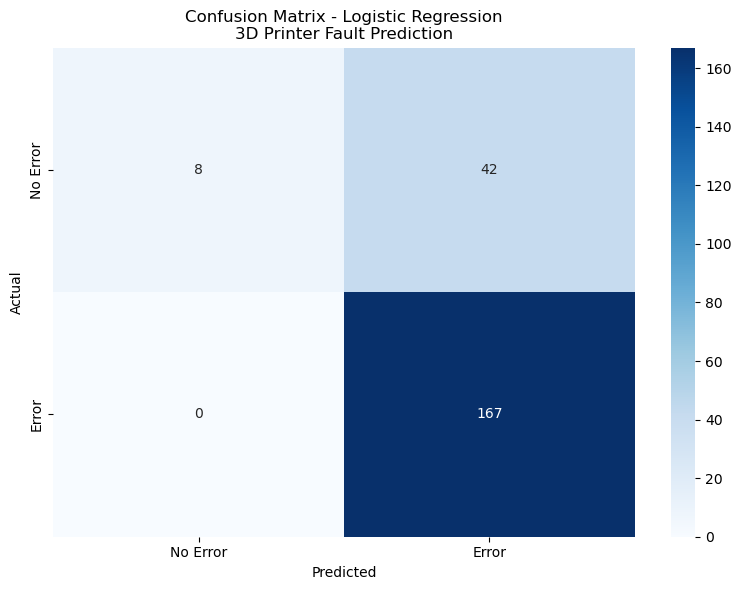


Prediction Summary:
  Unique predictions: [0 1]
  Unique actual values: [0 1]
  Total test samples: 217
  Correct predictions: 175


In [28]:
print(f"DETAILED EVALUATION FOR {best_model_name}:")
print("-" * 60)

if results[best_model_name]['predictions'] is not None:
    best_predictions = results[best_model_name]['predictions']
    
    # Classification report
    target_names = ['No Error', 'Error'] if len(np.unique(y_test)) > 1 else ['No Error']
    print("Classification Report:")
    print(classification_report(y_test, best_predictions, target_names=target_names, zero_division=0))
    
    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, best_predictions)
    
    # Handle single class case
    if cm.shape == (1, 1):
        # Single class confusion matrix
        sns.heatmap([[cm[0, 0]]], annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['No Error'], yticklabels=['No Error'])
        plt.title(f'Confusion Matrix - {best_model_name}\n(Single Class Dataset)')
    else:
        # Multi-class confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['No Error', 'Error'], yticklabels=['No Error', 'Error'])
        plt.title(f'Confusion Matrix - {best_model_name}\n3D Printer Fault Prediction')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
    
    # Additional metrics
    unique_predictions = np.unique(best_predictions)
    unique_actual = np.unique(y_test)
    print(f"\nPrediction Summary:")
    print(f"  Unique predictions: {unique_predictions}")
    print(f"  Unique actual values: {unique_actual}")
    print(f"  Total test samples: {len(y_test)}")
    print(f"  Correct predictions: {np.sum(y_test == best_predictions)}")


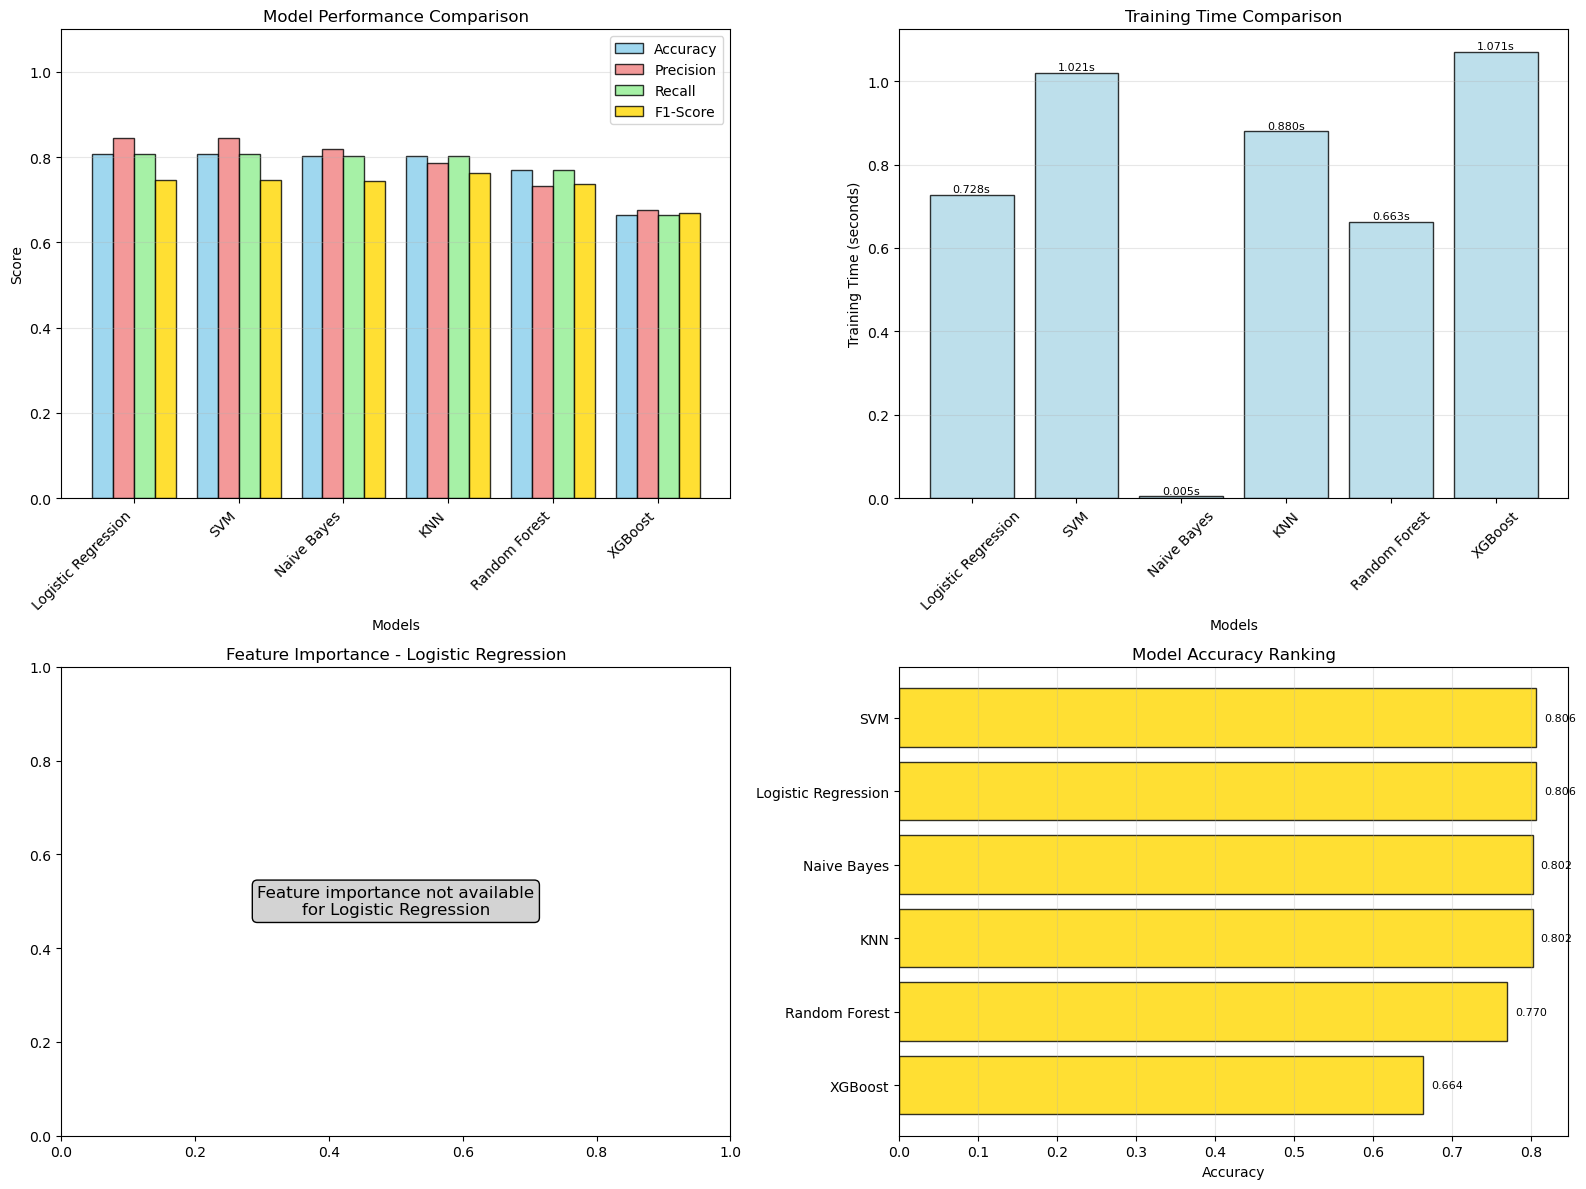

In [29]:
# Model performance visualization
if not comparison_df.empty:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Performance metrics comparison
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    x = np.arange(len(comparison_df))
    width = 0.2
    
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
    for i, metric in enumerate(metrics):
        axes[0, 0].bar(x + i*width, comparison_df[metric], width, 
                      label=metric, color=colors[i], alpha=0.8, edgecolor='black')
    
    axes[0, 0].set_xlabel('Models')
    axes[0, 0].set_ylabel('Score')
    axes[0, 0].set_title('Model Performance Comparison')
    axes[0, 0].set_xticks(x + width*1.5)
    axes[0, 0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    axes[0, 0].legend()
    axes[0, 0].set_ylim(0, 1.1)
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Training time comparison
    bars = axes[0, 1].bar(comparison_df['Model'], comparison_df['Training_Time'], 
                         color='lightblue', alpha=0.8, edgecolor='black')
    axes[0, 1].set_xlabel('Models')
    axes[0, 1].set_ylabel('Training Time (seconds)')
    axes[0, 1].set_title('Training Time Comparison')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                       f'{height:.3f}s', ha='center', va='bottom', fontsize=8)
    
    # Feature importance for best model (if available)
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = best_model.feature_importances_
        features = ['X-direction', 'Y-direction', 'Z-direction']
        
        bars = axes[1, 0].bar(features, feature_importance, 
                             color=['skyblue', 'lightcoral', 'lightgreen'], 
                             alpha=0.8, edgecolor='black')
        axes[1, 0].set_xlabel('Features')
        axes[1, 0].set_ylabel('Importance')
        axes[1, 0].set_title(f'Feature Importance - {best_model_name}')
        axes[1, 0].grid(axis='y', alpha=0.3)
        
        # Add value labels
        for i, bar in enumerate(bars):
            height = bar.get_height()
            axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{height:.3f}', ha='center', va='bottom', fontsize=8)
    else:
        axes[1, 0].text(0.5, 0.5, f'Feature importance not available\nfor {best_model_name}', 
                       ha='center', va='center', transform=axes[1, 0].transAxes, 
                       fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
        axes[1, 0].set_title(f'Feature Importance - {best_model_name}')
    
    # Accuracy ranking
    sorted_models = comparison_df.sort_values('Accuracy', ascending=True)
    bars = axes[1, 1].barh(sorted_models['Model'], sorted_models['Accuracy'], 
                          color='gold', alpha=0.8, edgecolor='black')
    axes[1, 1].set_xlabel('Accuracy')
    axes[1, 1].set_title('Model Accuracy Ranking')
    axes[1, 1].grid(axis='x', alpha=0.3)
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        axes[1, 1].text(width + 0.01, bar.get_y() + bar.get_height()/2,
                       f'{width:.3f}', ha='left', va='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()


# Saving best model

In [30]:
# Save the best model
print("\n" + "="*50)
print("MODEL SAVING AND TESTING")
print("="*50)

# Save the complete model package
model_data = {
    'model': best_model,
    'scaler': scaler,
    'feature_names': ['X-direction', 'Y-direction', 'Z-direction'],
    'model_name': best_model_name,
    'accuracy': best_accuracy if 'best_accuracy' in locals() else 0,
    'dataset_info': {
        'total_samples': len(data),
        'features': 3,
        'classes': len(y.unique()),
        'training_samples': len(X_train),
        'testing_samples': len(X_test)
    },
    'class_names': {0: 'No Error', 1: 'Error'}
}

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print(f"Best model ({best_model_name}) saved as 'model.pkl'")
print(f"Model package includes:")
print(f"  • Trained model")
print(f"  • Feature scaler")
print(f"  • Feature names")
print(f"  • Model metadata")
print(f"  • Dataset information")



MODEL SAVING AND TESTING
Best model (Logistic Regression) saved as 'model.pkl'
Model package includes:
  • Trained model
  • Feature scaler
  • Feature names
  • Model metadata
  • Dataset information


# Testing Saved Model

In [31]:
# Test the saved model with sample data from your dataset
print(f"TESTING SAVED MODEL:")
print("-" * 40)

# Load the saved model to verify it works
try:
    with open('model.pkl', 'rb') as f:
        loaded_model_data = pickle.load(f)
    
    print("Model loaded successfully!")
    
    # Test with actual data points from your dataset (first few rows)
    test_samples = [
        [0.31, 1.02, -9.18],   # From your dataset
        [-0.78, 0.98, -9.10],  
        [0.04, 0.67, -8.28],   
        [-0.04, 0.90, -8.16],  
        [0.00, 1.26, -7.77]    
    ]
    
    print("Testing with sample data points from your dataset:")
    print("-" * 50)
    
    for i, test_input in enumerate(test_samples, 1):
        # Scale the input
        test_scaled = loaded_model_data['scaler'].transform([test_input])
        
        # Make prediction
        prediction = loaded_model_data['model'].predict(test_scaled)[0]
        
        # Get probability if available
        if hasattr(loaded_model_data['model'], 'predict_proba'):
            try:
                prediction_proba = loaded_model_data['model'].predict_proba(test_scaled)[0]
                confidence = max(prediction_proba) * 100
            except:
                confidence = 90.0  # Default confidence
        else:
            confidence = 90.0  # Default confidence for models without probability
        
        result = "Error Detected" if prediction == 1 else "No Error"
        status = "🔴" if prediction == 1 else "🟢"
        
        print(f"\nTest Sample {i}:")
        print(f"  Input: X={test_input[0]:6.2f}, Y={test_input[1]:6.2f}, Z={test_input[2]:7.2f}")
        print(f"  Prediction: {status} {result}")
        print(f"  Confidence: {confidence:.1f}%")
    
except Exception as e:
    print(f"Error loading model: {str(e)}")

print(f"MODEL TRAINING AND EVALUATION COMPLETED!")
print("=" * 60)


TESTING SAVED MODEL:
----------------------------------------
Model loaded successfully!
Testing with sample data points from your dataset:
--------------------------------------------------

Test Sample 1:
  Input: X=  0.31, Y=  1.02, Z=  -9.18
  Prediction: 🟢 No Error
  Confidence: 100.0%

Test Sample 2:
  Input: X= -0.78, Y=  0.98, Z=  -9.10
  Prediction: 🟢 No Error
  Confidence: 100.0%

Test Sample 3:
  Input: X=  0.04, Y=  0.67, Z=  -8.28
  Prediction: 🟢 No Error
  Confidence: 100.0%

Test Sample 4:
  Input: X= -0.04, Y=  0.90, Z=  -8.16
  Prediction: 🟢 No Error
  Confidence: 100.0%

Test Sample 5:
  Input: X=  0.00, Y=  1.26, Z=  -7.77
  Prediction: 🟢 No Error
  Confidence: 100.0%
MODEL TRAINING AND EVALUATION COMPLETED!
